<a href="https://colab.research.google.com/github/MarcoCabral17/Marco-Cabral./blob/main/Examencalculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selecciona la funcionalidad que deseas visualizar:
1. Área bajo la curva
2. Animación del área bajo la curva
3. Área entre curvas
4. Animación del área entre curvas
5. Volumen de sólidos de revolución (Método de discos)
6. Volumen de sólidos de revolución (Método de arandelas)
Ingresa el número de la opción: 6
Ingresa el límite inferior (a): 1
Ingresa el límite superior (b): 5
Ingresa el número de particiones (n): 30


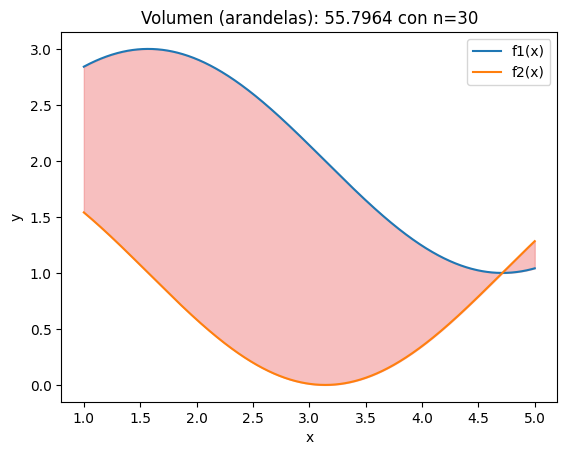

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Funciones de ejemplo para probar
def func1(x):
    return np.sin(x) + 2

def func2(x):
    return np.cos(x) + 1

# 1. Área bajo la curva (gráfico estático)
def area_bajo_curva(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = func(x)
    dx = (b - a) / n
    area = np.sum(y[:-1] * dx)

    x_fine = np.linspace(a, b, 1000)
    plt.plot(x_fine, func(x_fine), label='f(x)')
    plt.bar(x[:-1], y[:-1], width=dx, align='edge', color='skyblue', edgecolor='blue', alpha=0.5)
    plt.title(f"Área bajo la curva: {area:.4f} con n={n}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# 2. Animación del área bajo la curva
def animacion_area_bajo_curva(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = func(x)
    dx = (b - a) / n

    fig, ax = plt.subplots()
    x_fine = np.linspace(a, b, 1000)
    ax.plot(x_fine, func(x_fine), label='f(x)')
    bars = ax.bar(x[:-1], y[:-1], width=dx, align='edge', color='skyblue', edgecolor='blue', alpha=0.5)
    text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    def update(frame):
        for i in range(frame + 1):
            bars[i].set_color('orange')
        current_area = np.sum(y[:frame + 1] * dx)
        text.set_text(f'Área aproximada: {current_area:.4f}')
        return bars, text

    anim = FuncAnimation(fig, update, frames=len(x) - 1, blit=False, repeat=False)
    ax.set_title("Animación del área bajo la curva")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend()

    plt.show()
    return anim

# 3. Área entre curvas (gráfico estático)
def area_entre_curvas(func1, func2, a, b, n):
    x = np.linspace(a, b, n + 1)
    y1 = func1(x)
    y2 = func2(x)
    dx = (b - a) / n
    area = np.sum((y1 - y2)[:-1] * dx)

    x_fine = np.linspace(a, b, 1000)
    plt.plot(x_fine, func1(x_fine), label='f1(x)')
    plt.plot(x_fine, func2(x_fine), label='f2(x)')
    plt.fill_between(x, y1, y2, where=(y1 > y2), color='skyblue', alpha=0.5)
    plt.title(f"Área entre curvas: {area:.4f} con n={n}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# 4. Animación del área entre curvas
def animacion_area_entre_curvas(func1, func2, a, b, n):
    x = np.linspace(a, b, n + 1)
    y1 = func1(x)
    y2 = func2(x)
    dx = (b - a) / n

    fig, ax = plt.subplots()
    x_fine = np.linspace(a, b, 1000)
    ax.plot(x_fine, func1(x_fine), label='f1(x)')
    ax.plot(x_fine, func2(x_fine), label='f2(x)')
    text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    def update(frame):
        ax.clear()
        ax.plot(x_fine, func1(x_fine), label='f1(x)')
        ax.plot(x_fine, func2(x_fine), label='f2(x)')
        ax.fill_between(x[:frame + 1], y1[:frame + 1], y2[:frame + 1], color='skyblue', alpha=0.5)
        current_area = np.sum((y1[:frame + 1] - y2[:frame + 1]) * dx)
        ax.set_title(f"Área entre curvas: {current_area:.4f}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()

    anim = FuncAnimation(fig, update, frames=len(x) - 1, blit=False, repeat=False)
    plt.show()
    return anim

# 5. Volumen de sólidos de revolución (Método de discos)
def volumen_solido_discos(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = func(x)
    dx = (b - a) / n
    volumen = np.pi * np.sum((y[:-1] ** 2) * dx)

    x_fine = np.linspace(a, b, 1000)
    plt.plot(x_fine, func(x_fine), label='f(x)')
    plt.fill_between(x_fine, 0, func(x_fine), color='lightcoral', alpha=0.5)
    plt.title(f"Volumen (discos): {volumen:.4f} con n={n}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# 6. Volumen de sólidos de revolución (Método de arandelas)
def volumen_solido_arandelas(func1, func2, a, b, n):
    x = np.linspace(a, b, n + 1)
    y1 = func1(x)
    y2 = func2(x)
    dx = (b - a) / n
    volumen = np.pi * np.sum((y1[:-1] ** 2 - y2[:-1] ** 2) * dx)

    x_fine = np.linspace(a, b, 1000)
    plt.plot(x_fine, func1(x_fine), label='f1(x)')
    plt.plot(x_fine, func2(x_fine), label='f2(x)')
    plt.fill_between(x_fine, func1(x_fine), func2(x_fine), color='lightcoral', alpha=0.5)
    plt.title(f"Volumen (arandelas): {volumen:.4f} con n={n}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Menú principal
def main():
    print("Selecciona la funcionalidad que deseas visualizar:")
    print("1. Área bajo la curva")
    print("2. Animación del área bajo la curva")
    print("3. Área entre curvas")
    print("4. Animación del área entre curvas")
    print("5. Volumen de sólidos de revolución (Método de discos)")
    print("6. Volumen de sólidos de revolución (Método de arandelas)")

    opcion = int(input("Ingresa el número de la opción: "))
    a = float(input("Ingresa el límite inferior (a): "))
    b = float(input("Ingresa el límite superior (b): "))
    n = int(input("Ingresa el número de particiones (n): "))

    if opcion == 1:
        area_bajo_curva(func1, a, b, n)
    elif opcion == 2:
        animacion_area_bajo_curva(func1, a, b, n)
    elif opcion == 3:
        area_entre_curvas(func1, func2, a, b, n)
    elif opcion == 4:
        animacion_area_entre_curvas(func1, func2, a, b, n)
    elif opcion == 5:
        volumen_solido_discos(func1, a, b, n)
    elif opcion == 6:
        volumen_solido_arandelas(func1, func2, a, b, n)
    else:
        print("Opción no válida.")

# Ejecutar el programa principal
if __name__ == "__main__":
    main()
